In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
from scipy import stats
import cmaps
import cartopy.mpl.ticker as cticker
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings("ignore") 
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.weight"] = "bold"


### The model spin-up 20 years and select last 10 years output


In [2]:
file1 = xr.open_mfdataset("/data1/songqh/CESM_result/control_run_sg/control_run_sg.cam.h0.*-07.nc")
file2 = xr.open_mfdataset("/data1/songqh/CESM_result/heating_3/heat3.cam.h0.*-07.nc")
print(file1.ilev)
lon = np.array(file1['lon'])
lat = np.array(file1['lat'])
lev = np.array(file1['lev'])
heat1 = np.array(file1['PTENDT'].loc[file1.time.dt.month==8,lev[18]])[20:30].mean((0))
heat2 = np.array(file2['PTENDT'].loc[file2.time.dt.month==8,lev[18]])[20:30].mean((0))

hgt1 = np.array(file1['Z3'].loc[file1.time.dt.month==8,lev[14]])[20:30].mean(0)
hgt2 = np.array(file2['Z3'].loc[file2.time.dt.month==8,lev[14]])[20:30].mean(0)

uwnd1 = np.array(file1['U'].loc[file1.time.dt.month==8,lev[14]])[20:30].mean(0)
uwnd2 = np.array(file2['U'].loc[file2.time.dt.month==8,lev[14]])[20:30].mean(0)
vwnd1 = np.array(file1['V'].loc[file1.time.dt.month==8,lev[14]])[20:30].mean(0)
vwnd2 = np.array(file2['V'].loc[file2.time.dt.month==8,lev[14]])[20:30].mean(0)

ptend1 = np.array(file1['PTENDT'].loc[file1.time.dt.month==8,:,17:30,60:73])[0:1].mean((0,2,3))
ptend2 = np.array(file2['PTENDT'].loc[file2.time.dt.month==8,:,17:30,60:73])[0:1].mean((0,2,3))

<xarray.DataArray 'ilev' (ilev: 31)>
array([   2.25524 ,    5.031692,   10.157947,   18.555317,   30.669123,
         45.867477,   63.323483,   80.701418,   94.941042,  111.693211,
        131.401271,  154.586807,  181.863353,  213.952821,  251.704417,
        296.117216,  348.366588,  409.835219,  482.149929,  567.224421,
        652.332969,  730.445892,  796.363071,  845.353667,  873.715866,
        900.324631,  924.964462,  947.432335,  967.538625,  985.11219 ,
       1000.      ])
Coordinates:
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
Attributes:
    long_name:      hybrid level at interfaces (1000*(A+B))
    units:          level
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyai b: hybi p0: P0 ps: PS


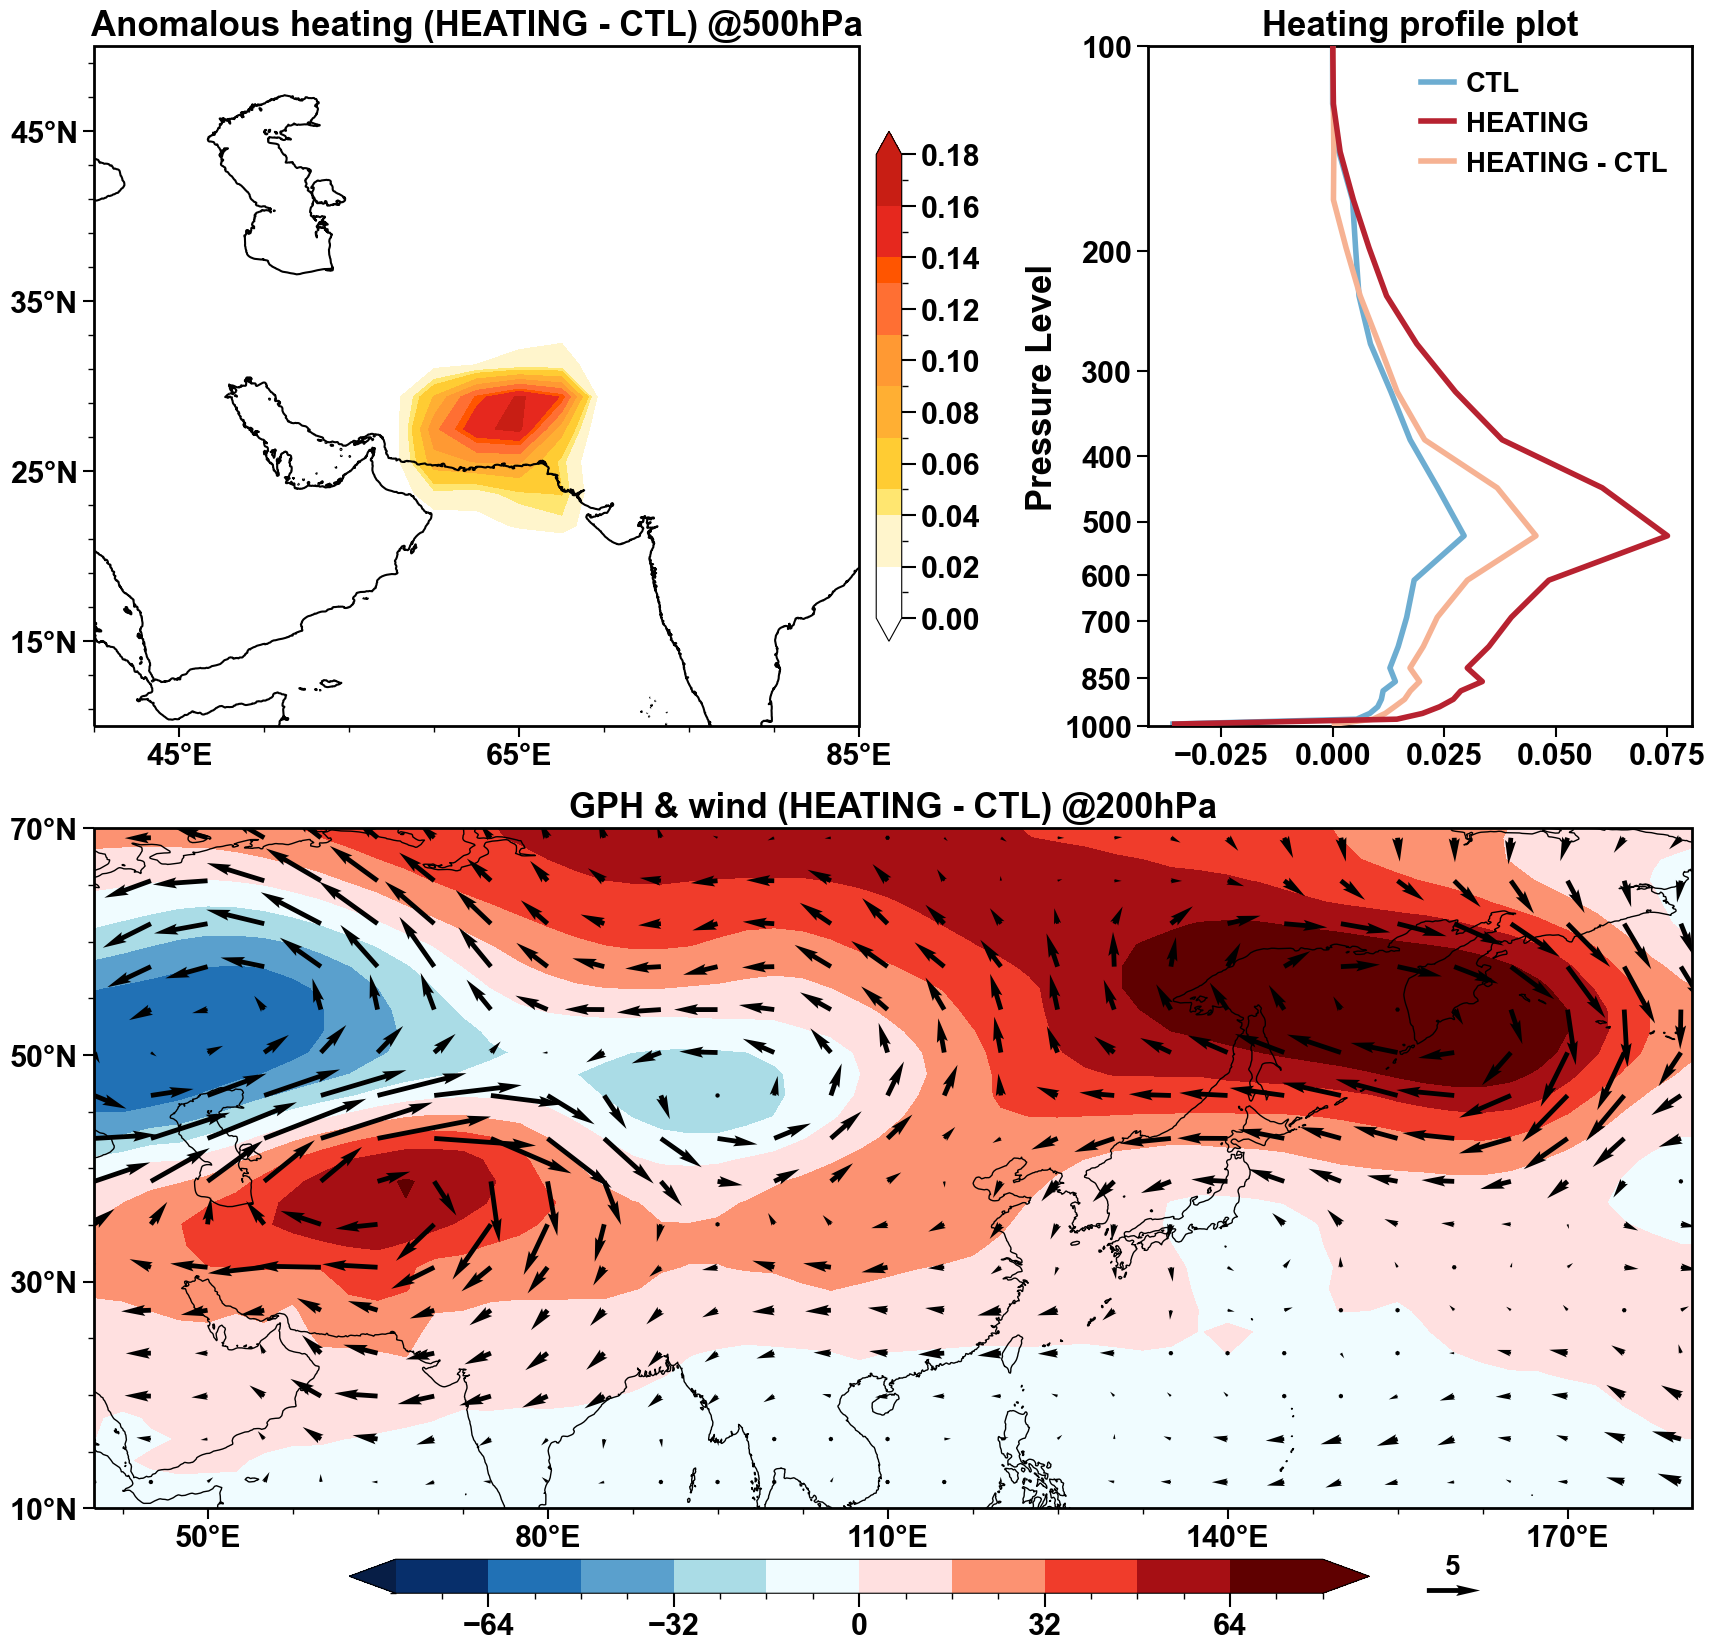

In [3]:
proj = ccrs.PlateCarree(central_longitude=60)
fig = plt.figure(figsize=(17,17))
ax1 = fig.add_axes([0.05,0.55,0.45,0.4],projection = proj)
leftlon, rightlon, lowerlat, upperlat = (40,85,10,50)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND.with_scale('10m'),color='lightgray') 
ax1.add_feature(cfeature.COASTLINE.with_scale('10m'),lw=1.5) 
ax1.set_xticks(np.arange(45,105,20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(15,55,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax = plt.gca()
ax.spines['geo'].set_linewidth(2)
cf1 = ax1.contourf(lon,lat,heat2-heat1, zorder=0,levels=np.arange(0,0.19,0.01),  extend = 'both',transform=ccrs.PlateCarree(), cmap=cmaps.sunshine_9lev)
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='out', bottom=True, length=4, width=1)
ax1.tick_params(direction='out', length=8, width=1.5, labelsize=22,axis='both', which='major')
ax1.set_title('Anomalous heating (HEATING - CTL) @500hPa',fontsize=25,loc='center',weight='bold',pad=8)
pos = fig.add_axes([0.51,0.6,0.015,0.3])
cb = fig.colorbar(cf1,cax=pos,orientation='vertical')
cb.ax.minorticks_on()
cb.ax.tick_params(labelsize=22, length=10, width=1.5)
cb.ax.tick_params(which='minor', direction='out', bottom=True, length=4, width=1)
cb.ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))

ax2 = fig.add_axes([0.67,0.55,0.32,0.4])
ax2.set_yscale('symlog')
ax2.set_ylim(100,1000)
ax2.set_yticks([1000,850,700,600,500,400,300,200,100])
ax2.set_yticklabels(['1000','850','700','600','500','400','300','200','100'])
ax2.set_ylabel('Pressure Level',fontsize=25,weight='bold')
ax2.plot(ptend1,lev,c=[109/255,173/255,209/255],lw=4,label='CTL',zorder=1)
ax2.plot(ptend2,lev,c=[183/255,34/255,48/255],lw=4,label='HEATING',zorder=110)
ax2.plot((ptend2 - ptend1),lev,color=[246/255,178/255,147/255],lw=4,label='HEATING - CTL',zorder=10)
ax2.invert_yaxis()
ax2.yaxis.tick_left()
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax2.tick_params(direction='out', length=8, width=1.5, labelsize=22,axis='both', which='major')
ax2.set_title('Heating profile plot',fontsize=25,loc='center',weight='bold',pad=8)
ax2.legend(ncol=1,fontsize=20,handlelength=1.2,handletextpad=0.4,columnspacing=1,frameon=False)

ax3 = fig.add_axes([0.05,0.09,0.94,0.4],projection = proj)
leftlon, rightlon, lowerlat, upperlat = (40,181,10,70)
# leftlon, rightlon, lowerlat, upperlat = (40,181,10,70)

img_extent = [leftlon, rightlon, lowerlat, upperlat]
ax3.set_extent(img_extent, crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND.with_scale('50m'),color='lightgray') 
ax3.add_feature(cfeature.COASTLINE.with_scale('50m')) 
ax3.set_xticks(np.arange(50,200,30), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(10,90,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax = plt.gca()
ax.spines['geo'].set_linewidth(2)
ax3.minorticks_on()
ax3.tick_params(which='minor', direction='out', bottom=True, length=4, width=1)
ax3.tick_params(direction='out', length=8, width=1.5, labelsize=22,axis='both', which='major')
ax3.set_title('GPH & wind (HEATING - CTL) @200hPa',fontsize=25,loc='center',weight='bold',pad=8)
q = ax3.quiver(lon[::2],lat[::2],(uwnd2-uwnd1)[::2,::2],(vwnd2-vwnd1)[::2,::2],scale=150,width=0.003,headwidth=2.3,color='k',zorder=10,
           transform=ccrs.PlateCarree())
qk = ax3.quiverkey(q,  0.85,-0.12, U=5, label='5',labelpos='N', coordinates='axes',color='k',fontproperties={'size': 20},labelcolor='k')

cf1 = ax3.contourf(lon,lat,hgt2-hgt1, zorder=0, levels=np.linspace(-80,80,11), extend = 'both',transform=ccrs.PlateCarree(), cmap=cmaps.temp_19lev)
pos = fig.add_axes([0.2,0.04,0.6,0.02])
cb = fig.colorbar(cf1,orientation='horizontal',cax=pos)
cb.ax.minorticks_on()
cb.ax.tick_params(labelsize=22, length=10, width=1.5)
cb.ax.tick_params(which='minor', direction='out', bottom=True, length=4, width=1)
cb.ax.yaxis.set_minor_locator(plt.MultipleLocator(16))
# fig.savefig("/public/home/songqh/project/figures/figure-6.jpg",dpi=600)
plt.show()

In [4]:
file1['PTENDT']

<xarray.DataArray 'PTENDT' (time: 30, lev: 30, lat: 96, lon: 144)>
dask.array<concatenate, shape=(30, 30, 96, 144), dtype=float32, chunksize=(1, 30, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) object 0001-08-01 00:00:00 ... 0030-08-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    mdims:         1
    units:         J/kg/s
    long_name:     Air heating rate
    cell_methods:  time: mean

### CAM5 the air heating rate in July 2022 is about three times compare mean state in Southern Pakistan 

In [5]:
total_q2 = np.trapz(ptend2[:],lev[:],axis=0)
total_q1 = np.trapz(ptend1[:],lev[:],axis=0)
print(total_q1,total_q2)

12.423082427053542 30.382199263016236
